In [148]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as st

%matplotlib inline

In [2]:
# Paths to base csv files
MDA_Table_Path = os.path.join("MDA_table" + os.sep, "Master_Table_MDA.csv")
MTR_Table_Path = os.path.join("MTR_table" + os.sep, "Master_Table_MTR.csv")

In [3]:
# Create Data Frames for 
MDA_DF = pd.read_csv(MDA_Table_Path)
MTR_DF = pd.read_csv(MTR_Table_Path)

In [4]:
# Change Indexes
MDA_DF = MDA_DF.set_index("ZONA")
MTR_DF = MTR_DF.set_index("ZONA")

In [5]:
# Merge MDA and MTR Data Frames to Master_DF
Master_DF = MTR_DF.merge(MDA_DF, on=["ZONA", "SISTEMA", "FECHA", "HORA"], how="outer")

In [6]:
# Clean empty rows from Master_DF
Master_DF = Master_DF.dropna()

In [7]:
# Create register DF of ZONAS where there are prices equal to zero
NULLS_DF = Master_DF.loc[(Master_DF["PRECIO MTR"] == 0) | (Master_DF["PRECIO MDA"] == 0), :]

In [8]:
# Drop rows from Master_DF where PRECIO MDA or PRECIO MTR equals zero
Master_DF = Master_DF.loc[(Master_DF["PRECIO MTR"] != 0) & (Master_DF["PRECIO MDA"] != 0), :]

In [24]:
# Add P_MTR-P_MDA Column and reset index
Master_DF["P_MTR–P_MDA"] = Master_DF["PRECIO MTR"] - Master_DF["PRECIO MDA"]
Master_DF = Master_DF.reset_index()

In [51]:
# Create table with rows having negative P_MTR-P_MDA values
Negs_DF = Master_DF.loc[Master_DF["P_MTR–P_MDA"] <= 0, :]
Negs_DF = Negs_DF.reset_index(drop=True)

In [87]:
# Count negative P_MTR-P_MDA occurencies in BCA System
BCA_Negs_DF = Negs_DF.loc[Negs_DF["SISTEMA"] == "BCA", ["ZONA", "SISTEMA"]]
BCA_Negs_DF = BCA_Negs_DF.groupby("ZONA").count()
BCA_Negs_DF = BCA_Negs_DF.rename(columns={"SISTEMA":"MTR-MDA < 0"})
BCA_Negs_DF = BCA_Negs_DF.reset_index()

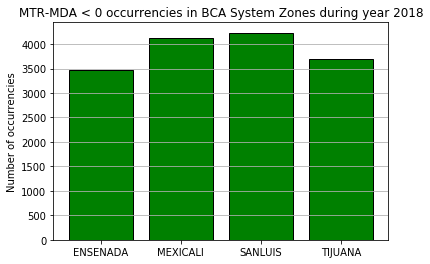

In [145]:
# Plot negative P_MTR-P_MDA occurencies in BCA System
plt.bar(BCA_Negs_DF["ZONA"], BCA_Negs_DF["MTR-MDA < 0"], edgecolor="black", color="green")
plt.title("MTR-MDA < 0 occurrencies in BCA System Zones during year 2018")
plt.ylabel("Number of occurrencies")
plt.grid(axis="y")
plt.show()

In [109]:
# Count negative P_MTR-P_MDA occurencies in BCS System
BCS_Negs_DF = Negs_DF.loc[Negs_DF["SISTEMA"] == "BCS", ["ZONA", "SISTEMA"]]
BCS_Negs_DF = BCS_Negs_DF.groupby("ZONA").count()
BCS_Negs_DF = BCS_Negs_DF.rename(columns={"SISTEMA":"MTR-MDA < 0"})
BCS_Negs_DF = BCS_Negs_DF.reset_index()

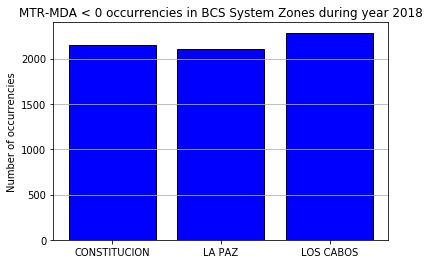

In [146]:
# Plot negative P_MTR-P_MDA occurencies in BCS System
plt.bar(BCS_Negs_DF["ZONA"], BCS_Negs_DF["MTR-MDA < 0"], edgecolor="black", color="blue")
plt.title("MTR-MDA < 0 occurrencies in BCS System Zones during year 2018")
plt.ylabel("Number of occurrencies")
plt.grid(axis="y")
plt.show()

In [111]:
# Count negative P_MTR-P_MDA occurencies in SIN System
SIN_Negs_DF = Negs_DF.loc[Negs_DF["SISTEMA"] == "SIN", ["ZONA", "SISTEMA"]]
SIN_Negs_DF = SIN_Negs_DF.groupby("ZONA").count()
SIN_Negs_DF = SIN_Negs_DF.rename(columns={"SISTEMA":"MTR-MDA < 0"})
SIN_Negs_DF = SIN_Negs_DF.reset_index()

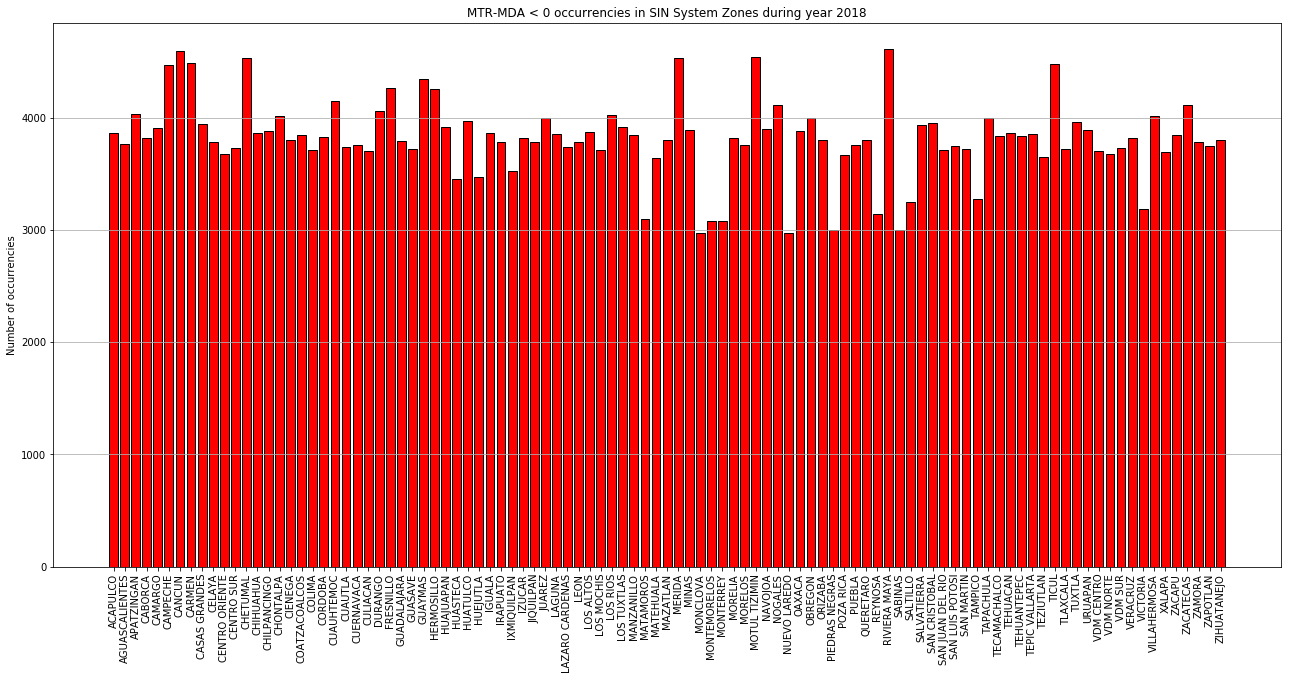

In [147]:
# Plot negative P_MTR-P_MDA occurencies in SIN System
plt.figure(figsize=(22,10))
plt.bar(SIN_Negs_DF["ZONA"], SIN_Negs_DF["MTR-MDA < 0"], edgecolor="black", color="red", align="center")
plt.title("MTR-MDA < 0 occurrencies in SIN System Zones during year 2018")
plt.xticks(rotation="vertical")
plt.ylabel("Number of occurrencies")
plt.grid(axis="y")
plt.show()